2.1 Gán nhãn ảnh

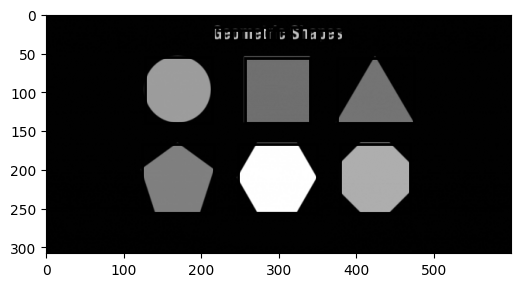

In [1]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
from skimage import measure, morphology
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu

# Load image and convert to grayscale
data = Image.open('geometric.png').convert('L')

# Convert image data to array
image_data = np.array(data)

# Apply Otsu's thresholding
thresh = threshold_otsu(image_data)
binary = image_data > thresh

# Labeling is performed on binary image
labeling = measure.label(binary)

# Create figure and axes
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

# Draw rectangular boxes with origin at (lr, lc)
for region in measure.regionprops(labeling):
    # Draw rectangle
    minr, minc, maxr, maxc = region.bbox
    rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                         edgecolor='black', linewidth=2, fill=False)
    ax.add_patch(rect)

# Display the labeled image
ax.imshow(data, cmap='gray')
plt.show()

2.2 Dò tìm cạnh theo chiều dọc

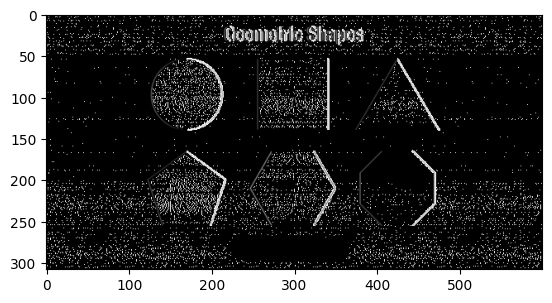

In [2]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pyplot as plt
import matplotlib.pylab as p

# Load the image and convert to grayscale
data = Image.open('geometric.png').convert('L')

# Convert image data to array
data = np.array(data)

# Calculate the background mask
bmg = np.abs(data - nd.shift(data, (0, 1), order=0))

# Display the background mask
plt.imshow(bmg, cmap='gray')
plt.show()

2.3 Dò  tìm cạnh với Sobel Filter


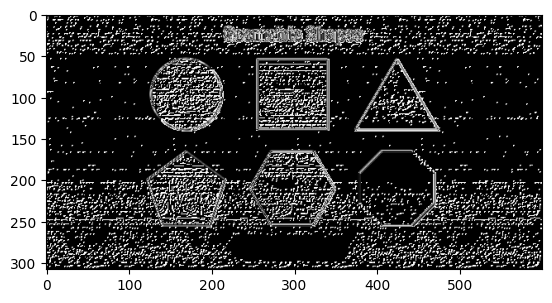

In [3]:
from PIL import Image
import numpy as np
import cv2
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pyplot as plt
import matplotlib.pylab as p
from skimage.filters import threshold_otsu

# Load the image and convert to grayscale
data = Image.open('geometric.png').convert('L')

# Convert image data to array
data = np.array(data)

# Apply Sobel filter
bmg = np.abs(nd.sobel(data, axis=0)) + np.abs(nd.sobel(data, axis=1))

# Display the result
plt.imshow(bmg, cmap='gray')
plt.show()

2.4 Xác định góc của đối tượng

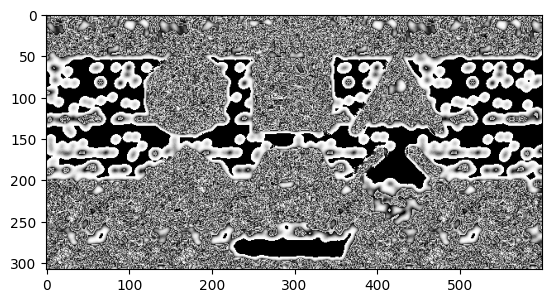

In [4]:
from PIL import Image
import numpy as np
import cv2
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.measure import regionprops
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu

def Harris(indata, alpha=0.04):
    x1 = nd.sobel(indata, 0)  # Sobel filter in x direction
    y1 = nd.sobel(indata, 1)  # Sobel filter in y direction
    xy = np.abs(x1 * y1)      # Compute the product of gradients

    # Apply Gaussian filter
    x = nd.gaussian_filter(x1 ** 2, (3, 3))
    y = nd.gaussian_filter(y1 ** 2, (3, 3))
    xy = nd.gaussian_filter(xy, (3, 3))

    # Compute determinant of the Harris matrix
    detC = x * y - xy ** 2
    return detC

# Load the image and convert to grayscale
data = Image.open('geometric.png').convert('L')

# Convert image data to array
data = np.array(data)

# Apply Harris corner detection
bmg = Harris(data)
plt.imshow(bmg, cmap='gray')
plt.show()

2.5.1.	Dò tìm đường thẳng trong ảnh

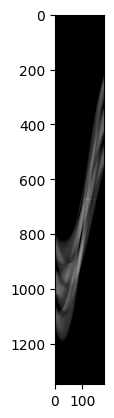

In [5]:
import numpy as np
import cv2
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt

def LineHough(data, gamma):
    v, h = data.shape
    R = int(np.sqrt(v**2 + h**2))  # Hough space
    H = np.zeros((2 * R, 180))
    
    for x in range(h):
        for y in range(v):
            if data[y, x]:  # If the pixel is part of an edge
                for theta in range(180):
                    rho = int(x * np.cos(np.deg2rad(theta)) + y * np.sin(np.deg2rad(theta))) + R
                    H[rho, theta] += 1

    return H

# Load the image and convert to grayscale
data = Image.open('geometric.png').convert('L')
data = np.array(data)

# Threshold the image to create a binary image
thresh = threshold_otsu(data)
binary_data = data > thresh

# Apply Hough transform
hough_space = LineHough(binary_data, gamma=1)

# Display the Hough space
plt.imshow(hough_space, cmap='gray')
plt.show()

2.5.2. Dò tìm đường tròn trong ảnh

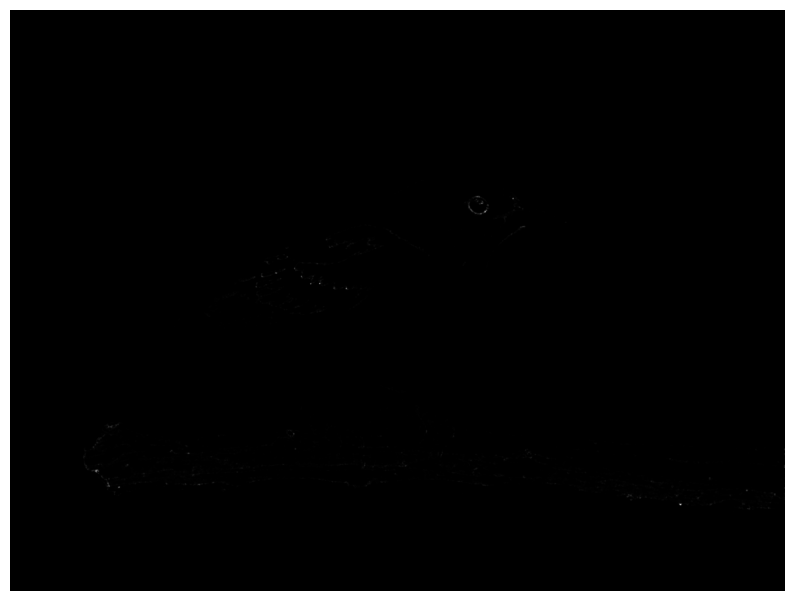

In [6]:
from PIL import Image
import numpy as np
import cv2
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pyplot as plt
from skimage.feature import corner_harris
from skimage.color import rgb2gray

# Load the image
data = iio.imread('bird.png')

# Convert the image to grayscale
image_gray = rgb2gray(data)

# Apply Harris corner detection
coordinate = corner_harris(image_gray, k=0.001)

# Display the results
plt.figure(figsize=(10, 10))
plt.imshow(coordinate, cmap='gray')
plt.axis('off')
plt.show()

2.6. Image matching

In [2]:
import cv2
import numpy as np

# Đọc hai bức ảnh
img1 = cv2.imread('dalat.jpg')  # Kiểm tra tên tệp
img2 = cv2.imread('bird.png')    # Đảm bảo tên tệp chính xác

# Kiểm tra xem ảnh có được đọc thành công không
if img1 is None:
    print("Không thể đọc ảnh dalat.jpg. Vui lòng kiểm tra đường dẫn và định dạng tệp.")
    exit()
if img2 is None:
    print("Không thể đọc ảnh bird.png. Vui lòng kiểm tra đường dẫn và định dạng tệp.")
    exit()

# Chuyển đổi ảnh sang ảnh xám
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Thực hiện phát hiện góc Harris
corners1 = cv2.cornerHarris(gray1, blockSize=2, ksize=3, k=0.04)
corners2 = cv2.cornerHarris(gray2, blockSize=2, ksize=3, k=0.04)

# Chuyển đổi góc thành hình ảnh nhị phân
corners1 = cv2.dilate(corners1, None)
corners2 = cv2.dilate(corners2, None)

# Đánh dấu các điểm góc trên ảnh
img1[corners1 > 0.01 * corners1.max()] = [0, 0, 255]
img2[corners2 > 0.01 * corners2.max()] = [0, 0, 255]

# Hiển thị các ảnh với các điểm góc được đánh dấu
cv2.imshow('Corners in Image 1', img1)
cv2.imshow('Corners in Image 2', img2)

# Tính mô tả đặc trưng cục bộ cho mỗi điểm
sift = cv2.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

# So sánh các đặc trưng
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)

# Sắp xếp các kết quả phù hợp
matches = sorted(matches, key=lambda x: x.distance)

# Vẽ các kết quả phù hợp
img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Hiển thị ảnh kết quả
cv2.imshow('Matches', img_matches)
cv2.waitKey(0)
cv2.destroyAllWindows()